100%|██████████| 2000/2000 [00:01<00:00, 1138.42it/s]


Training SVM...
Training Completed!

Classification Report: 
              precision    recall  f1-score   support

           0       0.54      0.64      0.58       201
           1       0.55      0.44      0.49       199

    accuracy                           0.54       400
   macro avg       0.54      0.54      0.54       400
weighted avg       0.54      0.54      0.54       400

Accuracy :  0.54


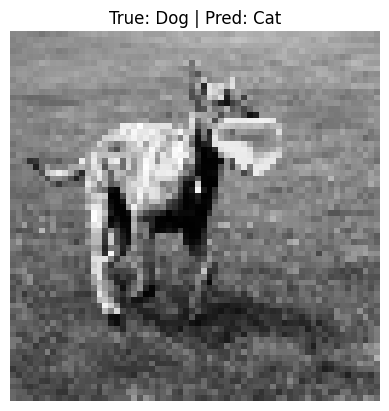

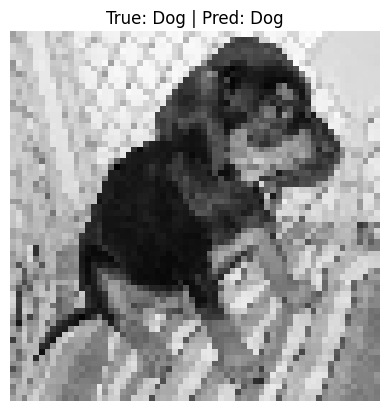

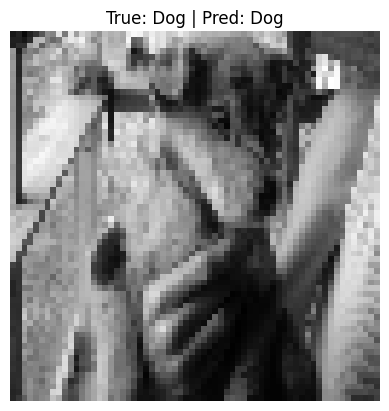

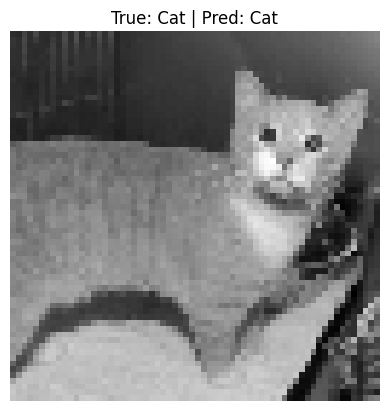

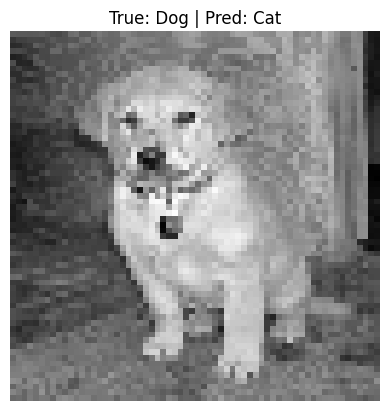

In [ ]:
import os
import cv2
import numpy as np 
import random
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

DATA_DIR = "data/train"
IMG_SIZE = 64

def load_data(data_dir, sample_size=2000):
    images = []
    labels = []

    files = os.listdir(data_dir)
    random.seed(42)   #random.seed(x) sets the starting point (or "seed") for the random number generator. So if you shuffle a list, or randomly sample data, setting the same seed will ensure you get the same result every time.
    random.shuffle(files)    #we shuffle because the first 12500 images are entirely of cats' and the next 12500 are of dogs', to get random 2000 we shuffle
    files = files[:sample_size]

    for file in tqdm(files):
        label = 1 if 'dog' in file else 0
        img_path = os.path.join(data_dir,file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        #grayscale image
        images.append(img.flatten())                       #flatten image to 1D
        labels.append(label)

    return np.array(images), np.array(labels)

X,y =load_data(DATA_DIR, sample_size=2000)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("Training SVM...")
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
print("Training Completed!")

y_pred=clf.predict(X_test)

print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

print("Accuracy : ", accuracy_score(y_test,y_pred))

# def show_predictions(X, y_true, y_pred, num=10, save_dir="visuals"):
#     for i in range(num):
#         img = X[i].reshape(IMG_SIZE, IMG_SIZE)
#         true_label = 'Dog' if y_true[i] == 1 else 'Cat'
#         pred_label = 'Dog' if y_pred[i] == 1 else 'Cat'

#         plt.imshow(img, cmap='gray')
#         plt.title(f"True: {true_label} | Pred: {pred_label}")
#         plt.axis('off')
#         filename = f"{save_dir}/sample_prediction_{i+1}.png"    # Saving the image
#         plt.savefig(filename, bbox_inches='tight')
#         plt.show()    # Show the image
#         plt.close()
# show_predictions(X_test, y_test, y_pred, num=5)




# Let's save the predictions in a grid format for a better visual representation
# This function will create a grid of images with their true and predicted labels
def save_predictions_grid(X, y_true, y_pred, num=9, save_path="visuals/grid_predictions.png"):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    cols = 3
    rows = (num + cols - 1) // cols  # auto-adjust rows

    plt.figure(figsize=(cols * 3, rows * 3))

    for i in range(num):
        img = X[i].reshape(IMG_SIZE, IMG_SIZE)
        true_label = 'Dog' if y_true[i] == 1 else 'Cat'
        pred_label = 'Dog' if y_pred[i] == 1 else 'Cat'

        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()  # Optional: display the grid
    plt.close()

save_predictions_grid(X_test, y_test, y_pred, num=9)
